# Data Comparisons

This section applies and compares methods on empirical datasets.

## Overview

In the previous sections, we have used simulated data to investigate properties of the aperiodic methods. While simulated data has the benefit of knowing ground truth parameters and systematically exploring variations in isolated parameters, simulation tests are limited in so far as there is no guarantee that reflect the realities of empirical data. 

In this section, we compare the methods on empirical data, to examine how they relate to each other in real data cases. 

## Contents

The following analyses and comparisons are applied to empirical datasets:

- `51-RestingEEGData`: analyzing a small sample of resting state EEG data
    - A small dataset of resting state EEG data collected in the VoytekLab
    - Young adult subjects (n=29, ages 18-28), with eyes-closed resting data
- `52-DevelopmentalEEGData`:  analyzing a large EEG dataset of developmental data
    - The MIPDB dataset, from the ChildMind Institute
    - Cross-sectional developmental data (n=126, ages 6-44), with eyes-open & eyes-closed resting data
- `53-iEEGData`: analyzing a large dataset of intracranial EEG data
    - The open iEEG Atlas, from the MNI
    - Clinical iEEG data, cortical electrodes (n=106, average age: 33)

## Applied Methods

The following methods are applied to the empirical datasets:
- SpecParam
- IRASA
- AutoCorrelation Decay Time
- DFA
- Higuchi Fractal Dimension
- Lempel-Ziv Complexity
- Hjorth Complexity
- Sample Entropy
- Permutation Entropy

## Code Approach

The general following strategy is taken:
- data files are loaded and organized
- measures of interest are computed on the empirical data
- results of the measures are compared to each other

The overarching function used to compute measures on data is the `run_measures` function.

This function allows for:
- taking a collection of data and a list of methods
- applying each measure across the data
- returning the collection of results

In [1]:
import numpy as np

from neurodsp.sim import sim_powerlaw

In [2]:
# Import the `run_measures` function from the custom code folder
import sys; from pathlib import Path
sys.path.append(str(Path('..').resolve()))

from apm.run import run_measures
from apm.analysis import compute_all_corrs
from apm.plts import plot_dots
from apm.sim.settings import N_SECONDS, FS
from apm.utils import format_corr

In [3]:
# Check the documentation for `run_measures`
print(run_measures.__doc__)

Compute multiple measures on empirical recordings - 2D array input.

    Parameters
    ----------
    data : 2d array
        Data to run measures on, organized as [channels, timepoints].
    measures : dict
        Functions to apply to the data.
        The keys should be functions to apply to the data.
        The values should be a dictionary of parameters to use for the method.

    Returns
    -------
    results : dict
        Output measures.
        The keys are labels for each applied method.
        The values are the computed measures for each method.
    


Next, we can run an example of using `run_measures`.

To do so, we will define an example analysis to apply some measures of interest (here, computing the mean and the variance). To mimic a real dataset, we will use some of the example simulated time series.

In [4]:
# Collect together an array of mock data
data = np.array([sim_powerlaw(N_SECONDS, FS, -1) for ind in range(10)])

In [5]:
# Define measures to apply
measures = {
     np.mean : {},
     np.median : {},
}

In [6]:
# Run measures across the data
results = run_measures(data, measures)

In [7]:
# Check output values of computed measures
results

{'mean': array([-3.03164901e-17,  0.00000000e+00,  0.00000000e+00,  1.32634644e-17,
        -7.57912251e-18,  0.00000000e+00, -7.57912251e-18,  0.00000000e+00,
         1.51582450e-17,  3.03164901e-17]),
 'median': array([-0.0316402 , -0.01114855,  0.03533156,  0.00083102,  0.01688073,
        -0.01612212,  0.00828682,  0.00874443, -0.02781252, -0.00277246])}

In [8]:
# Compute correlations across all pairs of methods
all_corrs = compute_all_corrs(results)

## Examine Results

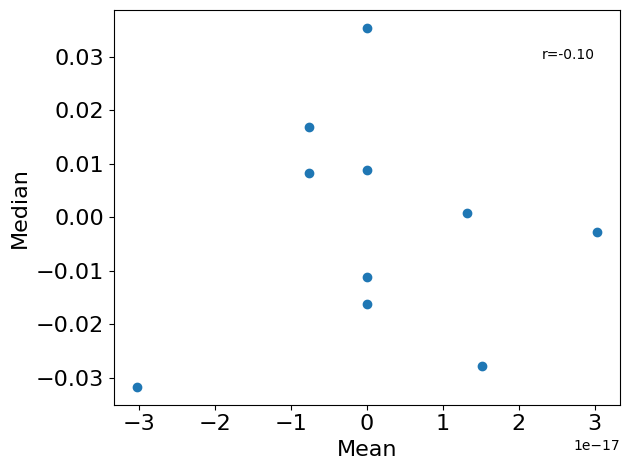

In [9]:
# Plot the comparison different measure estimations
plot_dots(results['mean'], results['median'], xlabel='Mean', ylabel='Median')

In [11]:
# Check the correlation
print('Mean & Median:  ', format_corr(*all_corrs['mean']['median']))

Mean & Median:   r=-0.100  CI[-0.799, +0.626],  p=0.783
